## Trabalho 1
Ciência de Dados — Prof. Rilder de Sousa Pires

* Alexandre Pinto, 2214674.
* Pedro Cabral, 2224609.
* Paulo Ruan, 2218935.
* Victor Nunes, 2217007.

### Preprocessamento

In [31]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [32]:
if not os.path.exists("./MICRODADOS_ENEM_2023.parquet"):
	
	print("Lendo `.csv` e transformando em `.parquet` (isto pode demorar um pouco)...")

	pd \
		.read_csv("./MICRODADOS_ENEM_2023.csv", delimiter = ";", encoding = "ISO-8859-1") \
		.to_parquet("./MICRODADOS_ENEM_2023.parquet", index = False)

print("Lendo arquivo `.parquet`... (é mais rápido)")
data = pd.read_parquet("./MICRODADOS_ENEM_2023.parquet")

Lendo arquivo `.parquet`... (é mais rápido)


In [4]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [5]:
notas = data[data["TP_PRESENCA_LC"] == 1]["NU_NOTA_LC"]

### Q1
> Existem valores atípicos nas notas da prova de “Linguagens, Códigos e suas Tecnologias”?

1. Faça um gráfico que represente como estão distribuídas as notas desta prova. Caracterize esses valores.

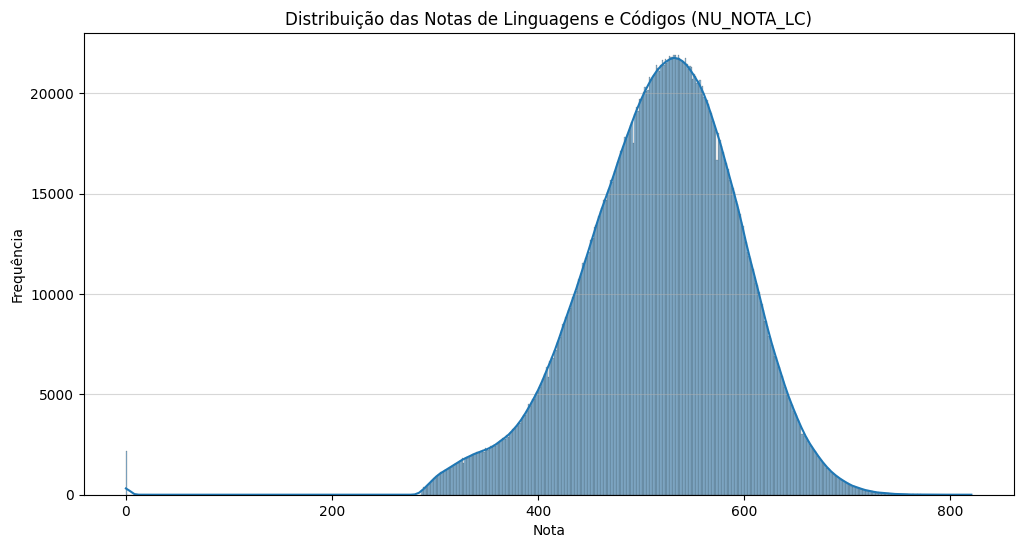

In [6]:
fig = plt.figure(figsize = (12, 6))
sns.histplot(notas, kde = True)
plt.title('Distribuição das Notas de Linguagens e Códigos (NU_NOTA_LC)')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(axis = 'y', alpha = 0.5)
plt.show()
fig.savefig("./IMGs/Gráfico-1.1.png", dpi = 500)

In [7]:
notas.describe().apply(lambda x: format(x, 'f'))

count    2822643.000000
mean         518.146637
std           75.452427
min            0.000000
25%          471.400000
50%          523.100000
75%          570.300000
max          820.800000
Name: NU_NOTA_LC, dtype: object

2. Faça um gráfico que permita visualizar ao mesmo tempo o valor típico e os valores atípicos das notas desta prova.

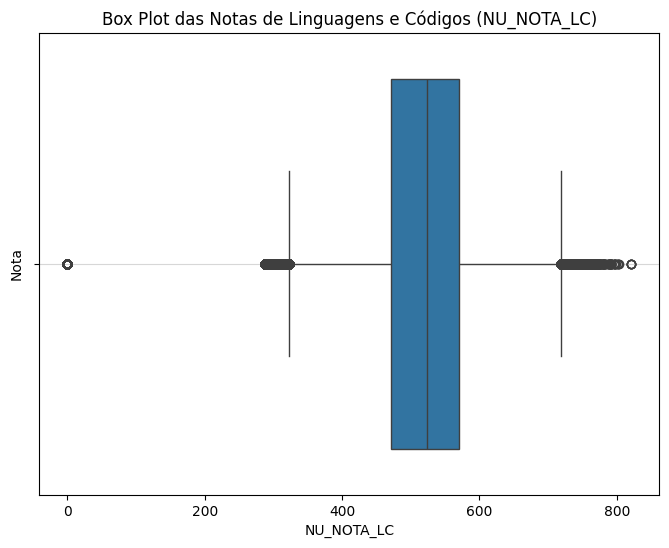

In [8]:
fig = plt.figure(figsize = (8, 6))
sns.boxplot(x = notas)
plt.title('Box Plot das Notas de Linguagens e Códigos (NU_NOTA_LC)')
plt.ylabel('Nota')
plt.grid(axis = 'y', alpha = 0.5)
plt.show()
fig.savefig("./IMGs/Gráfico-1.2.png", dpi = 300)

3/4. Caracterize os valores atípicos ABAIXO e ACIMA da "normalidade".

In [9]:
Q1 = notas.quantile(0.25)
Q3 = notas.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
print("Limites para Outliers (Cerco de Tukey):")
print(f"Q1 (25º percentil): {Q1:.2f}")
print(f"Q3 (75º percentil): {Q3:.2f}")
print(f"IQR (Intervalo Interquartil): {IQR:.2f}")
print(f"Limite Inferior (Q1 - 1.5*IQR): {lower_bound:.2f}")
print(f"Limite Superior (Q3 + 1.5*IQR): {upper_bound:.2f}")

Limites para Outliers (Cerco de Tukey):
Q1 (25º percentil): 471.40
Q3 (75º percentil): 570.30
IQR (Intervalo Interquartil): 98.90
Limite Inferior (Q1 - 1.5*IQR): 323.05
Limite Superior (Q3 + 1.5*IQR): 718.65


In [11]:
print(f'Número de alunos com notas abaixo da "normalidade": {len(notas[notas < lower_bound])}')
print(f'Número de alunos com notas acima da "normalidade": {len(notas[notas > upper_bound])}')

Número de alunos com notas abaixo da "normalidade": 27931
Número de alunos com notas acima da "normalidade": 2559


### Q2

> Existe diferença de FAIXA ETÁRIA entre os valores atípicos acima ou abaixo da "normalidade" para as notas de "Linguagens, Códigos e suas Tecnologias"?

In [19]:
faixa_etaria = {
	1: 'Menor de 17',
	2: '17 anos',
	3: '18 anos',
	4: '19 anos',
	5: '20 anos',
	6: '21 anos',
	7: '22 anos',
	8: '23 anos',
	9: '24 anos',
	10: '25 anos',
	11: '26-30 anos',
	12: '31-35 anos',
	13: '36-40 anos',
	14: '41-45 anos',
	15: '46-50 anos',
	16: '51-55 anos',
	17: '56-60 anos',
	18: '61-65 anos',
	19: '66-70 anos',
	20: 'Maior de 70'
}

In [20]:
outliers_baixos = data[(data["TP_PRESENCA_LC"] == 1) & (data["NU_NOTA_LC"] < lower_bound)].copy()
outliers_altos = data[(data["TP_PRESENCA_LC"] == 1) & (data["NU_NOTA_LC"] > upper_bound)].copy()

In [21]:
outliers_baixos['FAIXA_ETARIA_DESC'] = outliers_baixos['TP_FAIXA_ETARIA'].map(lambda x: faixa_etaria[x])
outliers_altos['FAIXA_ETARIA_DESC'] = outliers_altos['TP_FAIXA_ETARIA'].map(lambda x: faixa_etaria[x])

In [22]:
outliers_altos.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,FAIXA_ETARIA_DESC
5138,210060666748,2023,11,M,1,2,1,1,10,1,...,A,A,A,A,A,B,A,A,A,26-30 anos
7431,210059342619,2023,4,M,1,1,1,1,1,1,...,A,B,D,A,A,E,A,C,B,19 anos
7761,210060388831,2023,6,F,1,1,1,1,3,1,...,A,B,E,A,B,D,A,B,B,21 anos
9080,210058802859,2023,7,F,1,1,1,1,4,1,...,A,A,D,A,B,D,B,B,B,22 anos
9135,210059759729,2023,5,M,1,1,1,1,3,1,...,A,A,E,A,B,E,A,D,B,20 anos


In [23]:
ordem_faixa_etaria = [faixa_etaria[i] for i in faixa_etaria.keys()]

1. Faça um gráfico que represente como está distribuída a FAIXA ETÁRIA para os alunos que 
tiraram notas ABAIXO da “normalidade”. Caracterize esses valores.

/tmp/ipykernel_170865/802708040.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




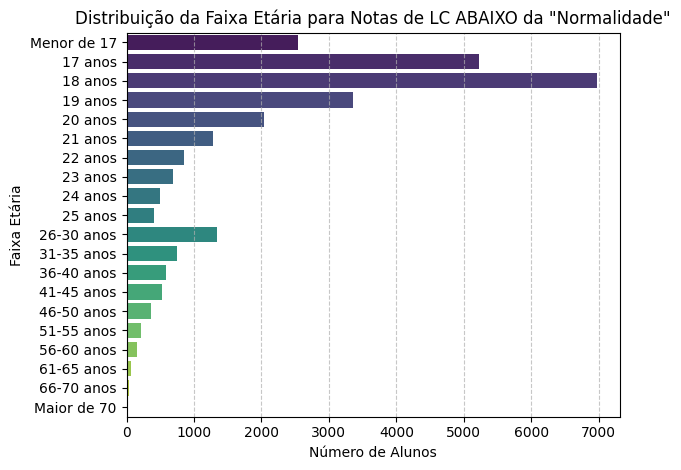

In [79]:
fig = plt.figure()
sns.countplot(data = outliers_baixos,
              y = 'FAIXA_ETARIA_DESC',
              order = ordem_faixa_etaria,
              palette = 'viridis')
plt.title('Distribuição da Faixa Etária para Notas de LC ABAIXO da "Normalidade"')
plt.xlabel('Número de Alunos')
plt.ylabel('Faixa Etária')
plt.grid(axis = 'x', linestyle = '--', alpha=0.7)
plt.tight_layout()
plt.show()
fig.savefig("./IMGs/Gráfico-2.1.png", dpi = 500)

2. Faça um gráfico que represente como está distribuída a FAIXA ETÁRIA para os alunos que tiraram notas ACIMA da “normalidade”. Caracterize esses valores.

/tmp/ipykernel_170865/3043864049.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




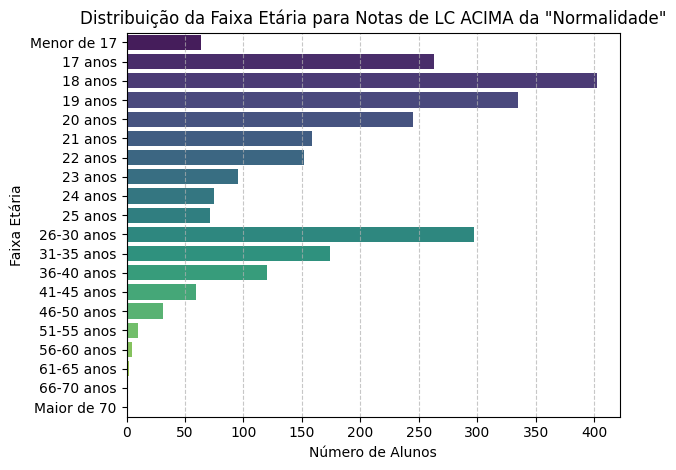

In [80]:
fig = plt.figure()
sns.countplot(data = outliers_altos,
              y = 'FAIXA_ETARIA_DESC',
              order = ordem_faixa_etaria,
              palette = 'viridis')
plt.title('Distribuição da Faixa Etária para Notas de LC ACIMA da "Normalidade"')
plt.xlabel('Número de Alunos')
plt.ylabel('Faixa Etária')
plt.grid(axis = 'x', linestyle = '--', alpha=0.7)
plt.tight_layout()
plt.show()
fig.savefig("./IMGs/Gráfico-2.2.png", dpi = 300)

### Q3
> Existe diferença de RENDA MENSAL FAMILIAR entre os valores atípicos acima ou abaixo da "normalidade" para as notas de "Linguagens, Códigos e suas Tecnologias"?

In [71]:
renda = {
	'A': r'Nenhuma Renda',
	'B': r'Até R\$ 1.320,00',
	'C': r'R\$ 1.320,01 - R\$ 1.980,00',
	'D': r'R\$ 1.980,01 - R\$ 2.640,00',
	'E': r'R\$ 2.640,01 - R\$ 3.300,00',
	'F': r'R\$ 3.300,01 - R\$ 3.960,00',
	'G': r'R\$ 3.960,01 - R\$ 5.280,00',
	'H': r'R\$ 5.280,01 - R\$ 6.600,00',
	'I': r'R\$ 6.600,01 - R\$ 7.920,00',
	'J': r'R\$ 7.920,01 - R\$ 9.240,00',
	'K': r'R\$ 9.240,01 - R\$ 10.560,00',
	'L': r'R\$ 10.560,01 - R\$ 11.880,00',
	'M': r'R\$ 11.880,01 - R\$ 13.200,00',
	'N': r'R\$ 13.200,01 - R\$ 15.840,00',
	'O': r'R\$ 15.840,01 - R\$ 19.800,00',
	'P': r'R\$ 19.800,01 - R\$ 26.400,00',
	'Q': r'Acima de R\$ 26.400,00'
}

In [72]:
outliers_baixos['RENDA_DESC'] = outliers_baixos['Q006'].map(lambda x: renda[x])
outliers_altos['RENDA_DESC'] = outliers_altos['Q006'].map(lambda x: renda[x])

In [73]:
ordem_renda = [renda[letra] for letra in sorted(renda.keys())]

1. Faça um gráfico que represente como está distribuída a RENDA MENSAL FAMILIAR para os alunos que tiraram notas ABAIXO da "normalidade". Caracterize esses valores.

/tmp/ipykernel_170865/1908194013.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




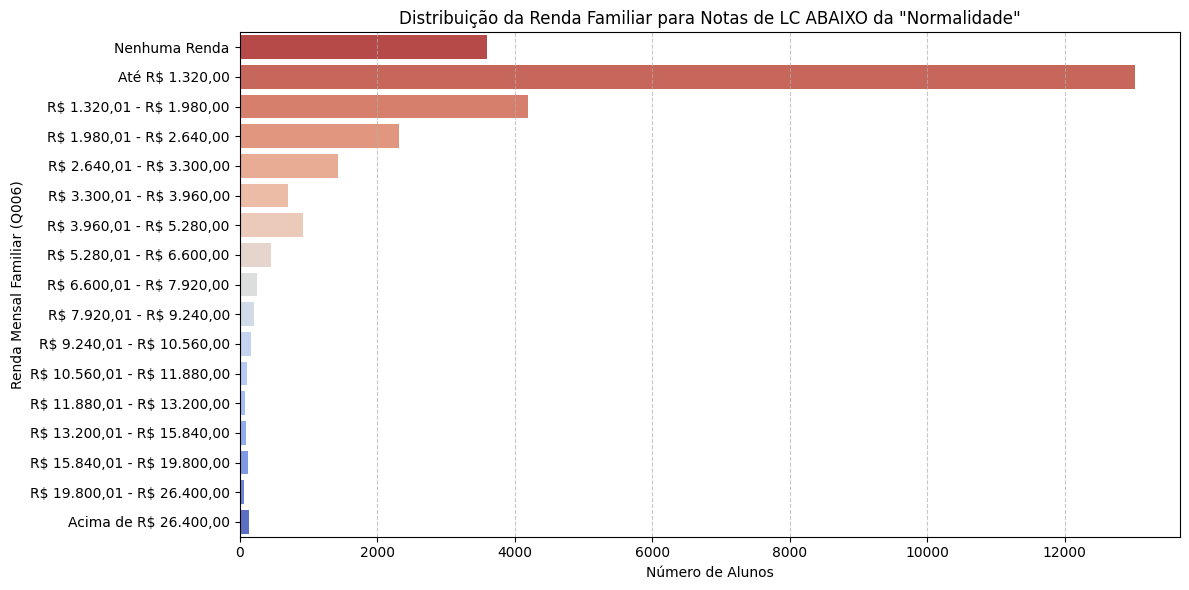

In [88]:
fig = plt.figure(figsize = (12, 6))
sns.countplot(data = outliers_baixos,
	y = 'RENDA_DESC',
	order = ordem_renda,
	palette = 'coolwarm_r')
plt.title('Distribuição da Renda Familiar para Notas de LC ABAIXO da "Normalidade"')
plt.xlabel('Número de Alunos')
plt.ylabel('Renda Mensal Familiar (Q006)')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()
fig.savefig("./IMGs/Gráfico-3.1.png", dpi = 500)

2. Faça um gráfico que represente como está distribuída a RENDA MENSAL FAMILIAR para os alunos que tiraram notas ACIMA da "normalidade". Caracterize esses valores.

/tmp/ipykernel_170865/2813404605.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




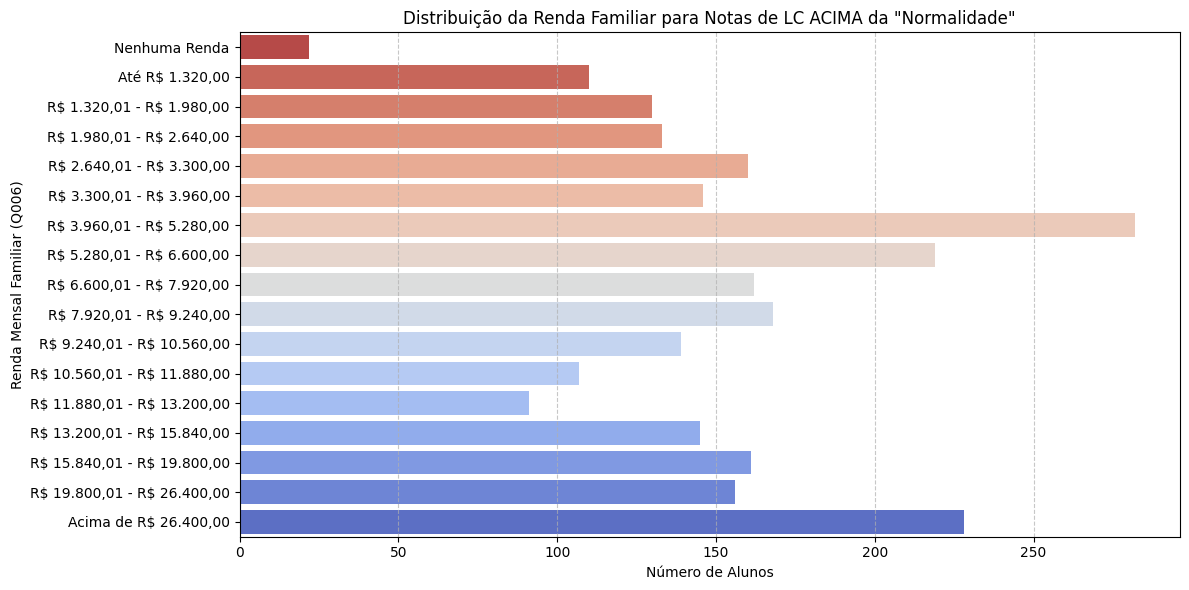

In [87]:
fig = plt.figure(figsize = (12, 6))
sns.countplot(data = outliers_altos,
	y = 'RENDA_DESC',
	order = ordem_renda,
	palette = 'coolwarm_r')
plt.title('Distribuição da Renda Familiar para Notas de LC ACIMA da "Normalidade"')
plt.xlabel('Número de Alunos')
plt.ylabel('Renda Mensal Familiar (Q006)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
fig.savefig("./IMGs/Gráfico-3.2.png", dpi = 500)

### Q4
> Existe diferença de ESCOLARIDADE DOS PAIS entre os valores atípicos acima ou abaixo da “normalidade” para as notas de “Linguagens, Códigos e suas Tecnologias”?

In [89]:
escolaridade = {
	"A": "Nunca estudou",
	"B": "Não completou 4ª série/5º ano EF",
	"C": "Completou 4ª/5º ano, não 8ª/9º ano EF",
	"D": "Completou 8ª/9º ano EF, não EM",
	"E": "Completou EM, não Faculdade",
	"F": "Completou Faculdade, não Pós",
	"G": "Completou Pós-graduação",
	"H": "Não sei"
}

In [90]:
ordem_escolaridade = [escolaridade[key] for key in sorted(escolaridade.keys())]

In [91]:
outliers_baixos['Q001_DESC'] = outliers_baixos['Q001'].map(escolaridade)
outliers_baixos['Q002_DESC'] = outliers_baixos['Q002'].map(escolaridade)

outliers_altos['Q001_DESC'] = outliers_altos['Q001'].map(escolaridade)
outliers_altos['Q002_DESC'] = outliers_altos['Q002'].map(escolaridade)

1. Faça um gráfico que represente como está distribuída a ESCOLARIDADE DOS PAIS para os alunos que tiraram notas ABAIXO da "normalidade". Caracterize esses valores.

/tmp/ipykernel_170865/1677941489.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



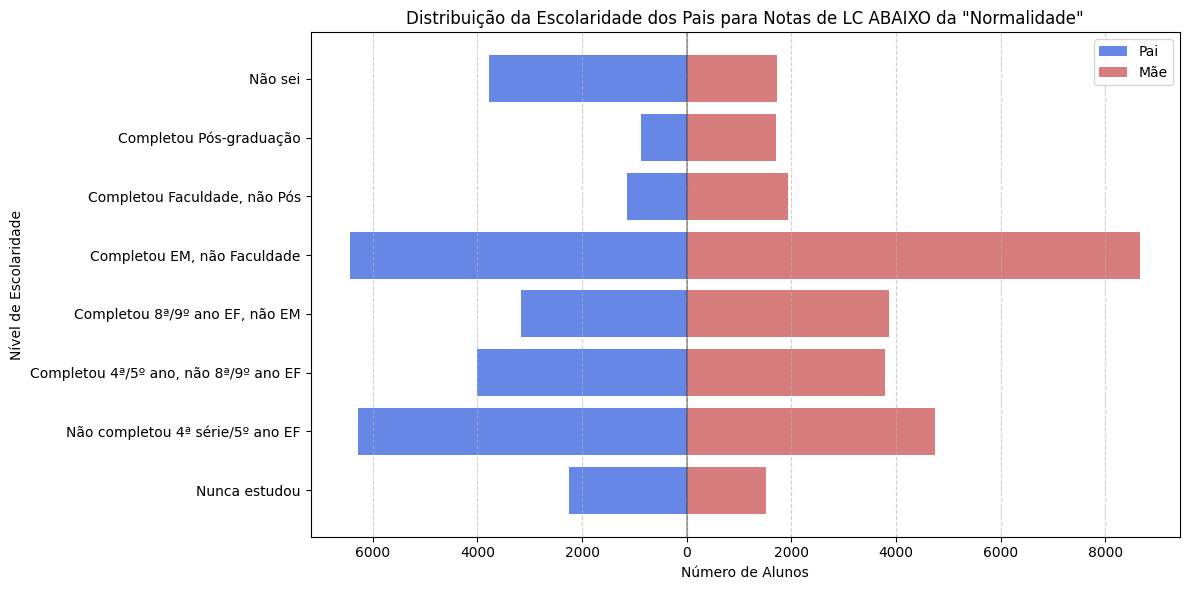

In [99]:
fig, ax = plt.subplots(figsize=(12, 6))

# Contagem para cada categoria de escolaridade
pai_counts = outliers_baixos['Q001_DESC'].value_counts().reindex(ordem_escolaridade).fillna(0)
mae_counts = outliers_baixos['Q002_DESC'].value_counts().reindex(ordem_escolaridade).fillna(0)

# Transformar as contagens do pai para valores negativos (lado esquerdo da pirâmide)
pai_counts = -pai_counts

# Criar o gráfico de barras horizontais
y_pos = np.arange(len(ordem_escolaridade))
ax.barh(y_pos, pai_counts, align='center', color='royalblue', alpha=0.8, label='Pai')
ax.barh(y_pos, mae_counts, align='center', color='indianred', alpha=0.8, label='Mãe')

# Adicionar rótulos de eixos e legendas
ax.set_yticks(y_pos)
ax.set_yticklabels(ordem_escolaridade)
ax.set_xlabel('Número de Alunos')
ax.set_ylabel('Nível de Escolaridade')

# Ajustar os rótulos do eixo x para mostrar valores absolutos
ticks = ax.get_xticks()
labels = [str(abs(int(x))) for x in ticks]
ax.set_xticklabels(labels)

# Adicionar grade
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Adicionar uma linha vertical no meio
ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Adicionar legenda
ax.legend(loc='upper right')

plt.title('Distribuição da Escolaridade dos Pais para Notas de LC ABAIXO da "Normalidade"')

plt.tight_layout()
plt.show()

fig.savefig("./IMGs/Gráfico-4.1.png", dpi = 500)

2. Faça um gráfico que represente como está distribuída a ESCOLARIDADE DOS PAIS para os alunos que tiraram notas ACIMA da "normalidade". Caracterize esses valores.

/tmp/ipykernel_170865/3906936331.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



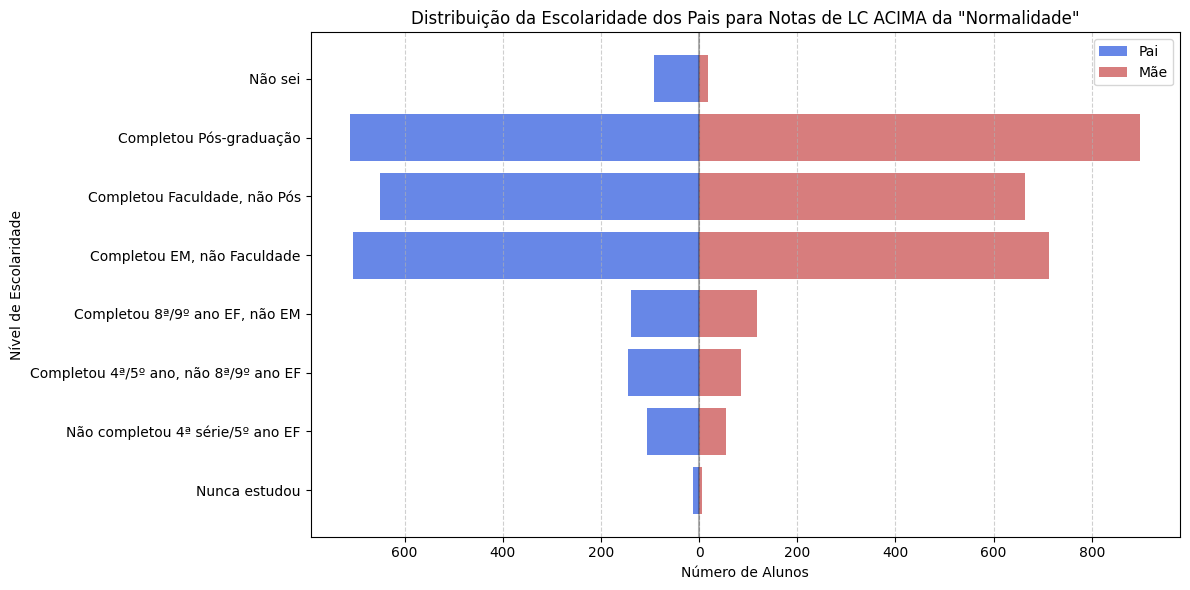

In [100]:
fig, ax = plt.subplots(figsize=(12, 6))

# Contagem para cada categoria de escolaridade
pai_counts = outliers_altos['Q001_DESC'].value_counts().reindex(ordem_escolaridade).fillna(0)
mae_counts = outliers_altos['Q002_DESC'].value_counts().reindex(ordem_escolaridade).fillna(0)

# Transformar as contagens do pai para valores negativos (lado esquerdo da pirâmide)
pai_counts = -pai_counts

# Criar o gráfico de barras horizontais
y_pos = np.arange(len(ordem_escolaridade))
ax.barh(y_pos, pai_counts, align='center', color='royalblue', alpha=0.8, label='Pai')
ax.barh(y_pos, mae_counts, align='center', color='indianred', alpha=0.8, label='Mãe')

# Adicionar rótulos de eixos e legendas
ax.set_yticks(y_pos)
ax.set_yticklabels(ordem_escolaridade)
ax.set_xlabel('Número de Alunos')
ax.set_ylabel('Nível de Escolaridade')

# Ajustar os rótulos do eixo x para mostrar valores absolutos
ticks = ax.get_xticks()
labels = [str(abs(int(x))) for x in ticks]
ax.set_xticklabels(labels)

# Adicionar grade
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Adicionar uma linha vertical no meio
ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.title('Distribuição da Escolaridade dos Pais para Notas de LC ACIMA da "Normalidade"')

# Adicionar legenda
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

fig.savefig("./IMGs/Gráfico-4.2.png", dpi = 500)

### Q5
> Existe diferença de ACESSO À INTERNET entre os valores atípicos acima ou abaixo da "normalidade" para as notas de "Linguagens, Códigos e suas Tecnologias"?

In [116]:
internet = {
    'A': 'Não',
    'B': 'Sim'
}

In [117]:
outliers_baixos['Q025_DESC'] = outliers_baixos['Q025'].map(internet)
outliers_baixos['Q025_DESC'] = outliers_baixos['Q025'].map(internet)

outliers_altos['Q025_DESC'] = outliers_altos['Q025'].map(internet)
outliers_altos['Q025_DESC'] = outliers_altos['Q025'].map(internet)

1. Faça um gráfico que represente como está distribuído o ACESSO À INTERNET para os alunos que tiraram notas ABAIXO da "normalidade". Caracterize esses valores.

/tmp/ipykernel_170865/1777643891.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




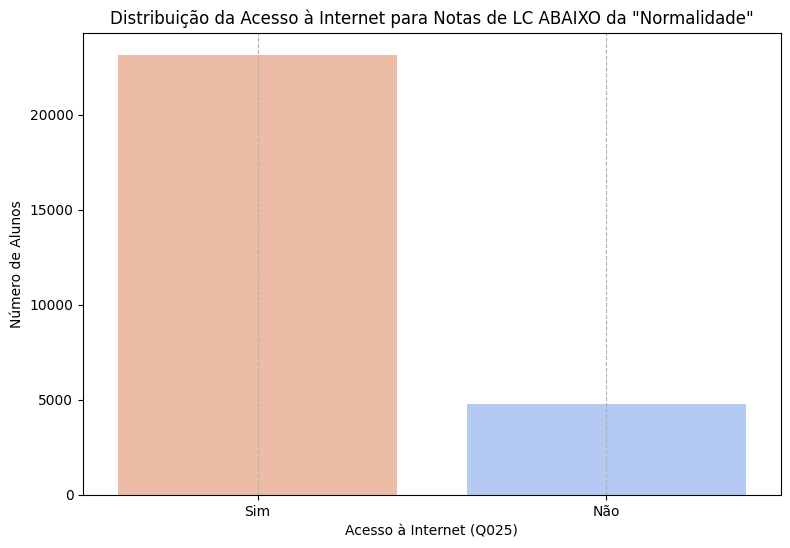

In [118]:
fig = plt.figure(figsize = (9, 6))

sns.countplot(data = outliers_baixos,
	x = 'Q025_DESC',
	order = ["Sim", "Não"],
	palette = 'coolwarm_r')
plt.title('Distribuição da Acesso à Internet para Notas de LC ABAIXO da "Normalidade"')
plt.ylabel('Número de Alunos')
plt.xlabel('Acesso à Internet (Q025)')
plt.grid(axis='x', linestyle='--')

fig.savefig("./IMGs/Gráfico-5.1.png", dpi = 500)

2. Faça um gráfico que represente como está distribuído o ACESSO À INTERNET para os alunos que tiraram notas ACIMA da "normalidade". Caracterize esses valores.

/tmp/ipykernel_170865/2618843364.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




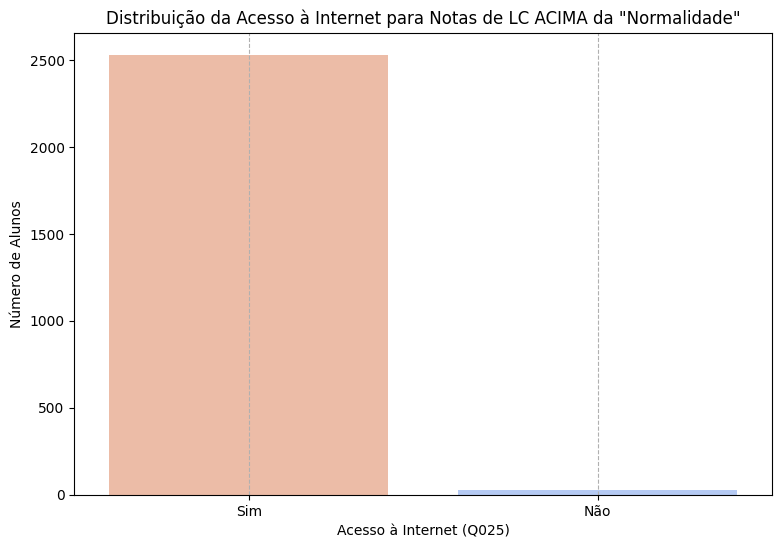

In [114]:
fig = plt.figure(figsize = (9, 6))

sns.countplot(data = outliers_altos,
	x = 'Q025_DESC',
	order = ["Sim", "Não"],
	palette = 'coolwarm_r')
plt.title('Distribuição da Acesso à Internet para Notas de LC ACIMA da "Normalidade"')
plt.ylabel('Número de Alunos')
plt.xlabel('Acesso à Internet (Q025)')
plt.grid(axis='x', linestyle='--')

fig.savefig("./IMGs/Gráfico-5.2.png", dpi = 500)

### Q6
> Existe diferença de TIPO DE ESCOLA entre os valores atípicos acima ou abaixo da "normalidade" para as notas de "Linguagens, Códigos e suas Tecnologias"?

In [108]:
escola = {
	1: 'Não Respondeu',
	2: 'Pública',
	3: 'Privada'
}

In [109]:
outliers_baixos['TP_ESCOLA_DESC'] = outliers_baixos['TP_ESCOLA'].map(escola)
outliers_baixos['TP_ESCOLA_DESC'] = outliers_baixos['TP_ESCOLA'].map(escola)

outliers_altos['TP_ESCOLA_DESC'] = outliers_altos['TP_ESCOLA'].map(escola)
outliers_altos['TP_ESCOLA_DESC'] = outliers_altos['TP_ESCOLA'].map(escola)

1. Faça um gráfico que represente como está distribuído o TIPO DE ESCOLA para os alunos que tiraram notas ABAIXO da "normalidade". Caracterize esses valores.

/tmp/ipykernel_170865/389933325.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




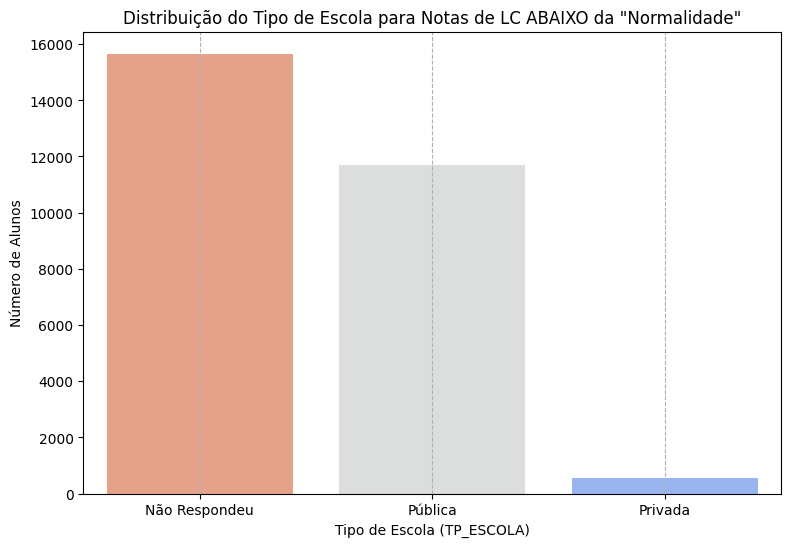

In [113]:
fig = plt.figure(figsize = (9, 6))

sns.countplot(data = outliers_baixos,
	x = 'TP_ESCOLA_DESC',
	palette = 'coolwarm_r')
plt.title('Distribuição do Tipo de Escola para Notas de LC ABAIXO da "Normalidade"')
plt.ylabel('Número de Alunos')
plt.xlabel('Tipo de Escola (TP_ESCOLA)')
plt.grid(axis='x', linestyle='--')

fig.savefig("./IMGs/Gráfico-6.1.png", dpi = 500)

2. Faça um gráfico que represente como está distribuído o TIPO DE ESCOLA para os alunos que tiraram notas ACIMA da "normalidade". Caracterize esses valores.

/tmp/ipykernel_170865/1217592600.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




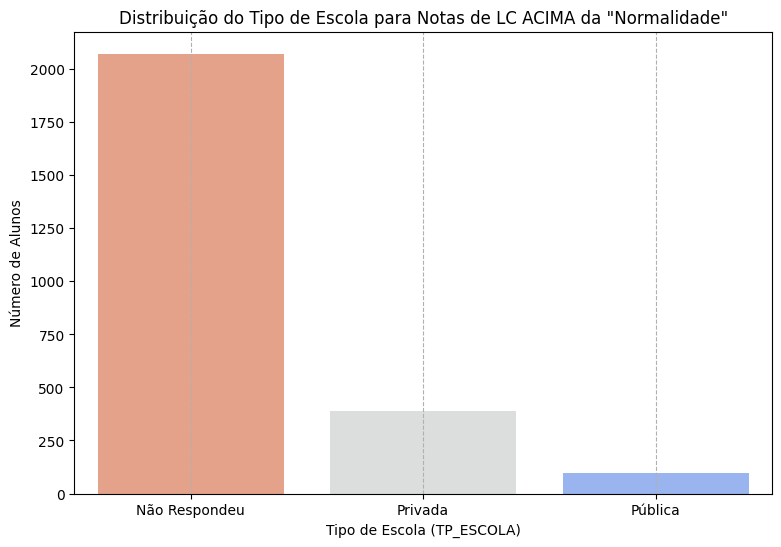

In [119]:
fig = plt.figure(figsize = (9, 6))

sns.countplot(data = outliers_altos,
	x = 'TP_ESCOLA_DESC',
	palette = 'coolwarm_r')
plt.title('Distribuição do Tipo de Escola para Notas de LC ACIMA da "Normalidade"')
plt.ylabel('Número de Alunos')
plt.xlabel('Tipo de Escola (TP_ESCOLA)')
plt.grid(axis='x', linestyle='--')

fig.savefig("./IMGs/Gráfico-6.2.png", dpi = 500)

### Q7
> Existe diferença da LOCALIZAÇÃO DA ESCOLA entre os valores atípicos acima ou abaixo da “normalidade” para as notas de “Linguagens, Códigos e suas Tecnologias”?

In [120]:
localizacao_escola = {
    1: 'Urbana',
    2: 'Rural'
}

In [121]:
outliers_baixos['TP_LOCALIZACAO_ESC_DESC'] = outliers_baixos['TP_LOCALIZACAO_ESC'].map(localizacao_escola)
outliers_baixos['TP_LOCALIZACAO_ESC_DESC'] = outliers_baixos['TP_LOCALIZACAO_ESC'].map(localizacao_escola)

outliers_altos['TP_LOCALIZACAO_ESC_DESC'] = outliers_altos['TP_LOCALIZACAO_ESC'].map(localizacao_escola)
outliers_altos['TP_LOCALIZACAO_ESC_DESC'] = outliers_altos['TP_LOCALIZACAO_ESC'].map(localizacao_escola)

1. Faça um gráfico que represente como está distribuída a LOCALIZAÇÃO DA ESCOLA para os alunos que tiraram notas ABAIXO da “normalidade”. Caracterize esses valores.

/tmp/ipykernel_170865/330961068.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




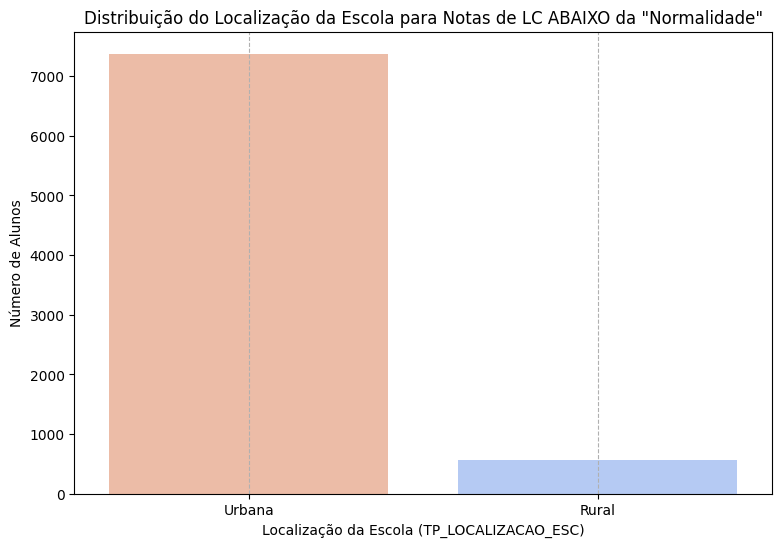

In [122]:
fig = plt.figure(figsize = (9, 6))

sns.countplot(data = outliers_baixos,
	x = 'TP_LOCALIZACAO_ESC_DESC',
	palette = 'coolwarm_r')
plt.title('Distribuição do Localização da Escola para Notas de LC ABAIXO da "Normalidade"')
plt.ylabel('Número de Alunos')
plt.xlabel('Localização da Escola (TP_LOCALIZACAO_ESC)')
plt.grid(axis='x', linestyle='--')

fig.savefig("./IMGs/Gráfico-7.1.png", dpi = 500)

2. Faça um gráfico que represente como está distribuída a LOCALIZAÇÃO DA ESCOLA para os alunos que tiraram notas ACIMA da “normalidade”. Caracterize esses valores.

/tmp/ipykernel_170865/3083503914.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




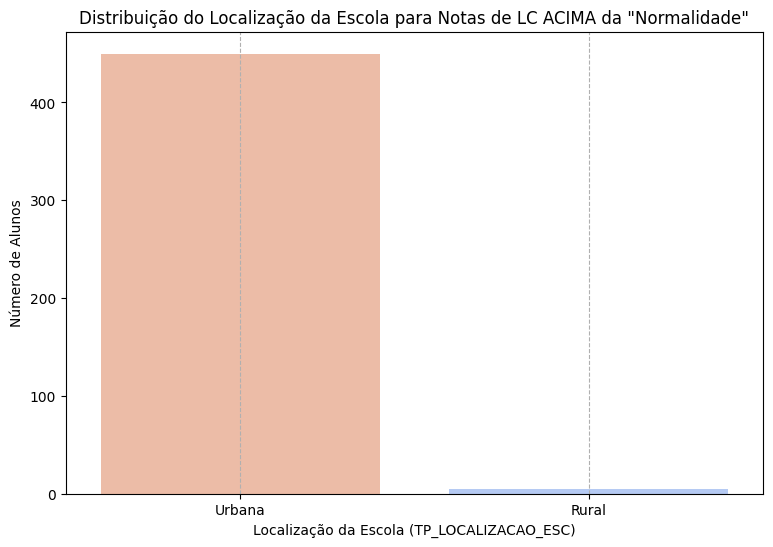

In [123]:
fig = plt.figure(figsize = (9, 6))

sns.countplot(data = outliers_altos,
	x = 'TP_LOCALIZACAO_ESC_DESC',
	palette = 'coolwarm_r')
plt.title('Distribuição do Localização da Escola para Notas de LC ACIMA da "Normalidade"')
plt.ylabel('Número de Alunos')
plt.xlabel('Localização da Escola (TP_LOCALIZACAO_ESC)')
plt.grid(axis='x', linestyle='--')

fig.savefig("./IMGs/Gráfico-7.2.png", dpi = 500)

### Q8
> Existe diferença da UF DA ESCOLA entre os valores atípicos acima ou abaixo da “normalidade” para as notas de “Linguagens, Códigos e suas Tecnologias”?

1. Faça um gráfico que represente como está distribuída a UF DA ESCOLA para os alunos que tiraram notas ABAIXO da “normalidade”. Caracterize esses valores.

/tmp/ipykernel_170865/2653044089.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




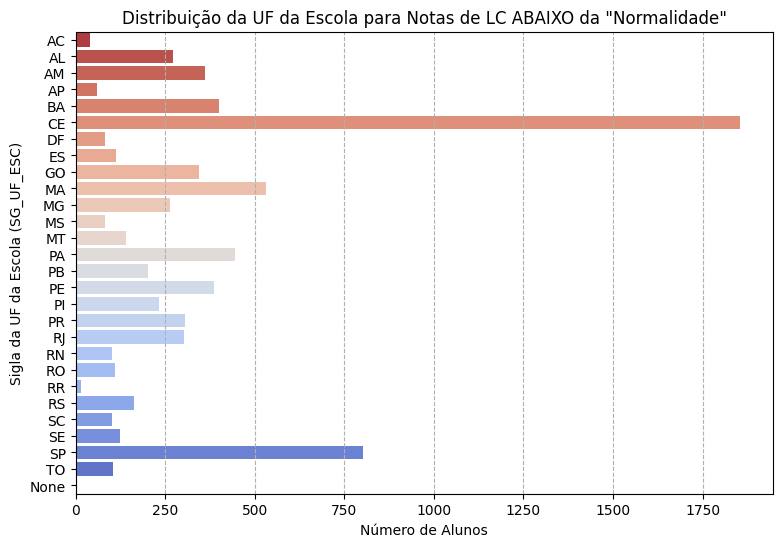

In [ ]:
fig = plt.figure(figsize = (9, 6))

sns.countplot(data = outliers_baixos,
	y = 'SG_UF_ESC',
	palette = 'coolwarm_r',
    order = outliers_baixos["SG_UF_ESC"].sort_values().unique())
plt.title('Distribuição da UF da Escola para Notas de LC ABAIXO da "Normalidade"')
plt.xlabel('Número de Alunos')
plt.ylabel('Sigla da UF da Escola (SG_UF_ESC)')
plt.grid(axis='x', linestyle='--')

fig.savefig("./IMGs/Gráfico-8.1.png", dpi = 500)

2. Faça um gráfico que represente como está distribuída a UF DA ESCOLA para os alunos que tiraram notas ACIMA da “normalidade”. Caracterize esses valores.

/tmp/ipykernel_170865/2953503377.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




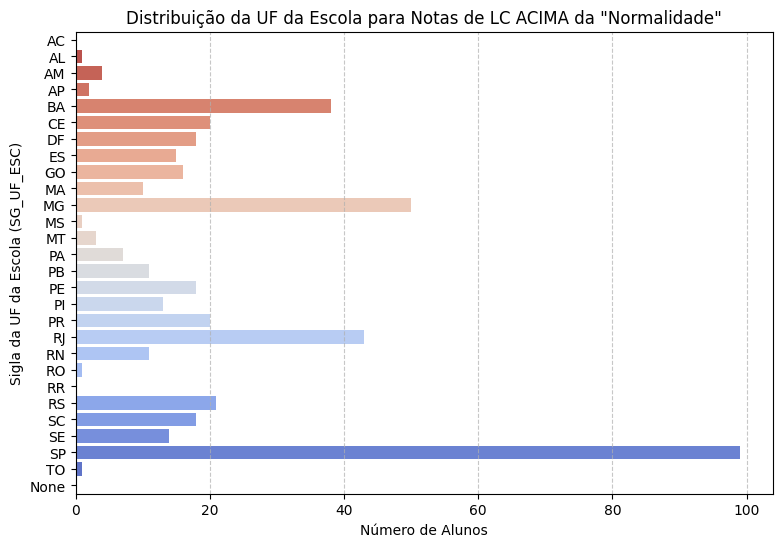

In [126]:
fig = plt.figure(figsize = (9, 6))

sns.countplot(data = outliers_altos,
	y = 'SG_UF_ESC',
	palette = 'coolwarm_r',
    order = outliers_baixos["SG_UF_ESC"].sort_values().unique())
plt.title('Distribuição da UF da Escola para Notas de LC ACIMA da "Normalidade"')
plt.xlabel('Número de Alunos')
plt.ylabel('Sigla da UF da Escola (SG_UF_ESC)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

fig.savefig("./IMGs/Gráfico-8.2.png", dpi = 500)

### Q9
> Como se distribui os  MUNICÍPIOS DE APLICAÇÃO DA PROVA de acordo com a quantidade de alunos com notas atípicas na prova de “Linguagens, Códigos e suas Tecnologias”?

In [25]:
contagem_baixos_por_municipio = outliers_baixos['NO_MUNICIPIO_PROVA'].value_counts()
contagem_altos_por_municipio = outliers_altos['NO_MUNICIPIO_PROVA'].value_counts()

df_contagens_municipio = pd.DataFrame({
	'Contagem_Baixos': contagem_baixos_por_municipio,
	'Contagem_Altos': contagem_altos_por_municipio
}).reset_index()

df_contagens_municipio['Total_Outliers'] = df_contagens_municipio['Contagem_Baixos'] + df_contagens_municipio['Contagem_Altos']

df_contagens_municipio = df_contagens_municipio.sort_values(by = 'Total_Outliers', ascending = False)

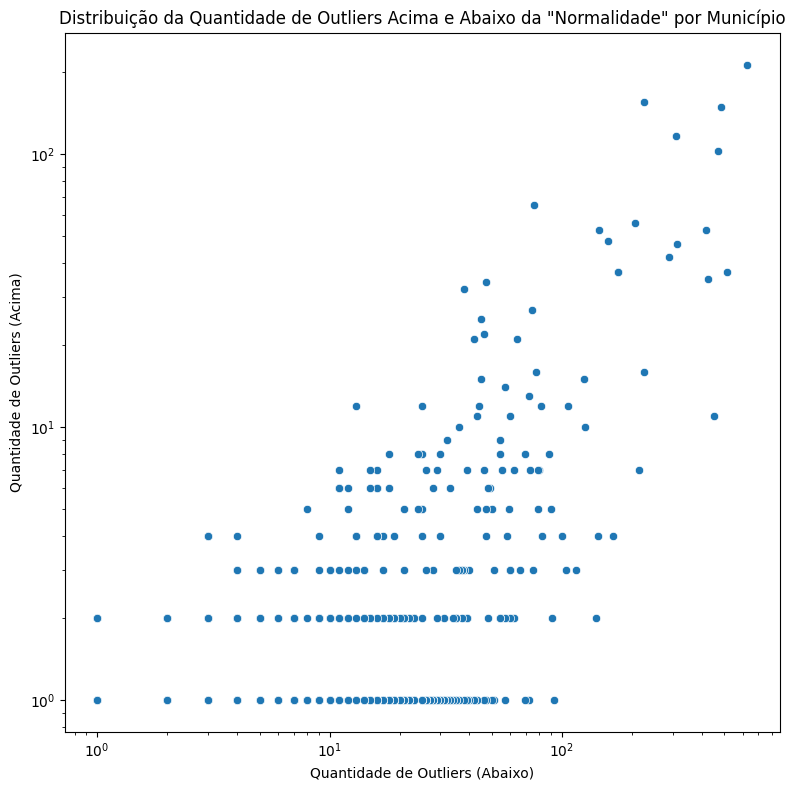

In [26]:
x = df_contagens_municipio.reset_index()["Contagem_Baixos"]
y = df_contagens_municipio.reset_index()["Contagem_Altos"]

fig = plt.figure(figsize = (8, 8))

ax = sns.scatterplot(
    x = df_contagens_municipio["Contagem_Baixos"],
    y = df_contagens_municipio["Contagem_Altos"],
)

ax.set(xlabel = 'Quantidade de Outliers (Abaixo)', ylabel = 'Quantidade de Outliers (Acima)')

plt.title('Distribuição da Quantidade de Outliers Acima e Abaixo da "Normalidade" por Município')

ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
plt.show()

fig.savefig("./IMGs/Gráfico-9.1.png", dpi = 500)

1. Faça um gráfico que represente como estão distribuídos os MUNICÍPIOS DE APLICAÇÃO DA PROVA de acordo com a quantidade de alunos que tiraram notas atípicas ABAIXO da normalidade. Caracterize esses valores.

2. Faça um gráfico que represente como estão distribuídos os MUNICÍPIOS DE APLICAÇÃO DA PROVA de acordo com a quantidade de alunos que tiraram notas atípicas ACIMA da normalidade. Caracterize esses valores.

### Q10
> Como se relacionam as quantidades de alunos que tiraram notas atípicas acima e abaixo da normalidade por MUNICÍPIO DE APLICAÇÃO DA PROVA para as notas de “Linguagens, Códigos e suas Tecnologias”?

Contagem de Outliers (Baixos e Altos) por Município de Prova (Top 20)
     NO_MUNICIPIO_PROVA  Contagem_Baixos  Contagem_Altos  Total_Outliers
1477          São Paulo            628.0           213.0           841.0
1274     Rio de Janeiro            481.0           149.0           630.0
557           Fortaleza            468.0           103.0           571.0
195               Belém            512.0            37.0           549.0
1295           Salvador            416.0            53.0           469.0
878              Manaus            451.0            11.0           462.0
1461           São Luís            424.0            35.0           459.0
235            Brasília            308.0           117.0           425.0
192      Belo Horizonte            226.0           156.0           382.0
1238             Recife            313.0            47.0           360.0
1520           Teresina            290.0            42.0           332.0
584             Goiânia            207.0            56

<Figure size 1200x900 with 0 Axes>

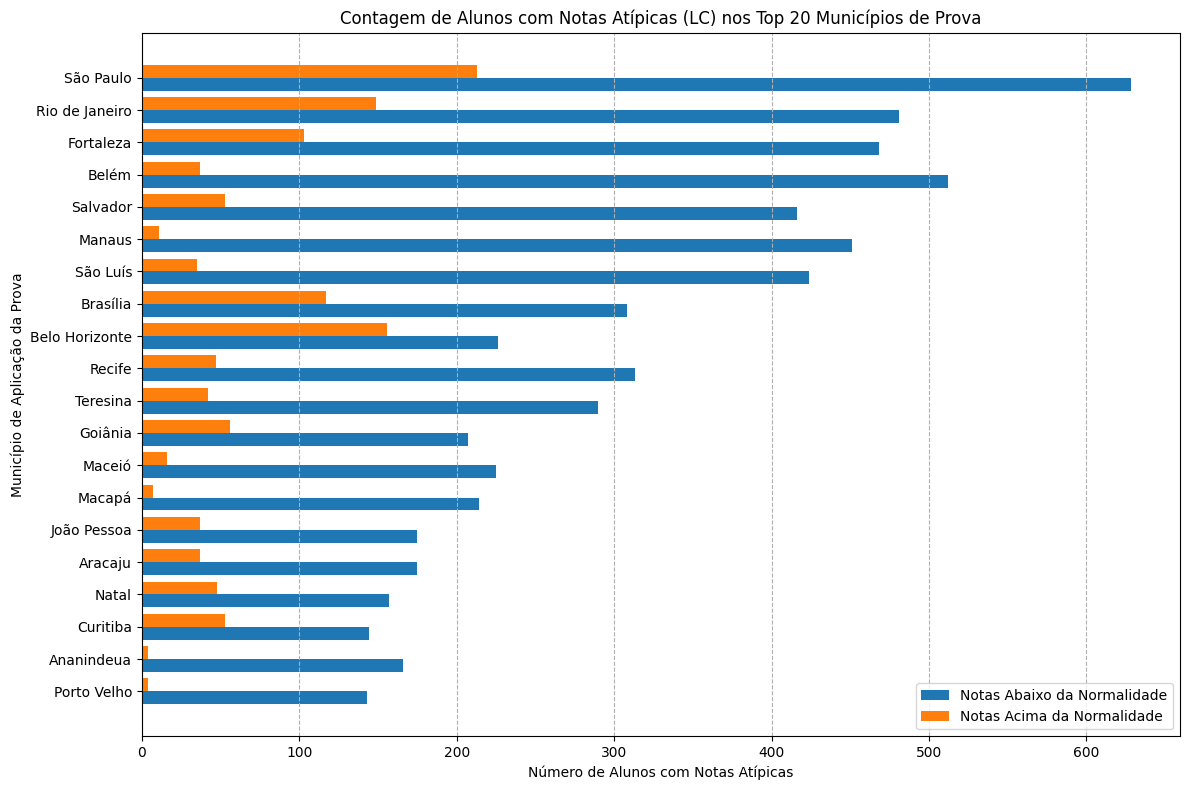

In [ ]:
top_n = 20

print(f"Contagem de Outliers (Baixos e Altos) por Município de Prova (Top {top_n})")
print(df_contagens_municipio.head(top_n))

municipios_plot = df_contagens_municipio.head(top_n)
municipios_plot = municipios_plot.iloc[::-1]

municipios = df_contagens_municipio["NO_MUNICIPIO_PROVA"]

fig = plt.figure(figsize=(12, 9))

fig, ax = plt.subplots(figsize=(12, max(8, top_n * 0.4)))

width = 0.8

indices = np.arange(top_n)

ax.barh(indices - width / 4, municipios_plot['Contagem_Baixos'], height=width/2, label='Contagem Baixos')
ax.barh(indices + width / 4, municipios_plot['Contagem_Altos'], height=width/2, label='Contagem Altos')

ax.set_yticks(indices)
ax.set_yticklabels(municipios[:top_n].to_list()[::-1])

plt.title(f'Contagem de Alunos com Notas Atípicas (LC) nos Top {top_n} Municípios de Prova')
plt.xlabel('Número de Alunos com Notas Atípicas')
plt.ylabel('Município de Aplicação da Prova')
plt.legend(['Notas Abaixo da Normalidade', 'Notas Acima da Normalidade'])
plt.grid(axis='x', linestyle='--')

plt.tight_layout()
plt.show()

fig.savefig("./IMGs/Gráfico-10.1.png", dpi = 500)

### Q11
> Ser de um sexo específico (Masculino, Feminino) faz diferença da nota de Linguagens e Códigos?

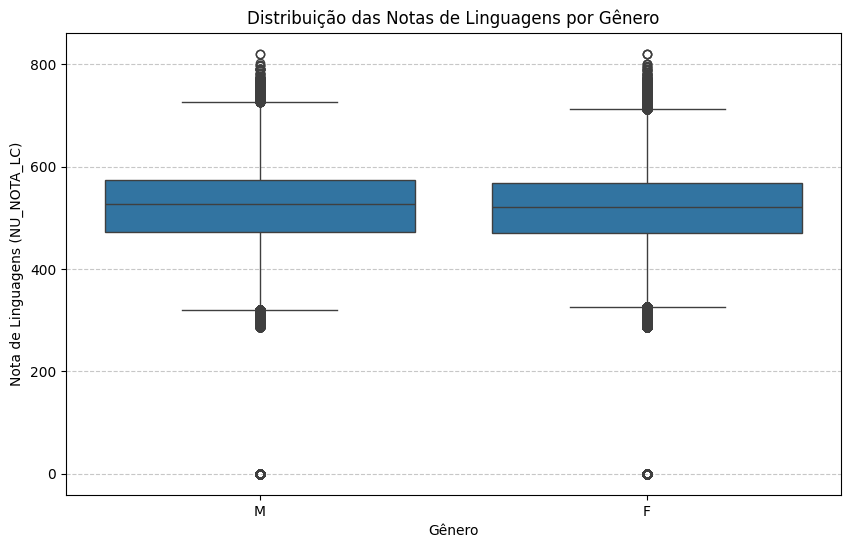

In [ ]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="TP_SEXO", y="NU_NOTA_LC")
plt.title("Distribuição das Notas de Linguagens por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Nota de Linguagens (NU_NOTA_LC)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
fig.savefig("./IMGs/Gráfico-11.1.png", dpi = 500)
plt.show()

### Q12
> Ter um computador em casa faz diferença na nota de Linguagens e Códigos?

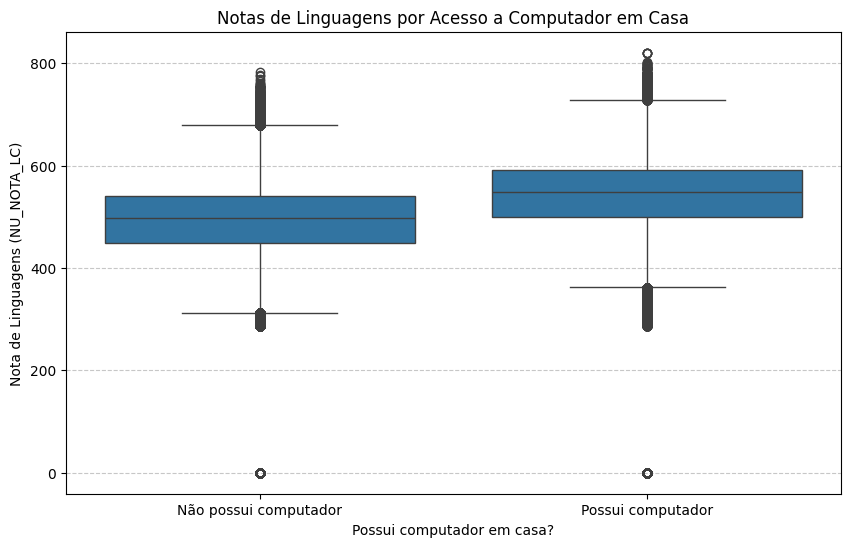

In [38]:
data["Q024_DESC"] = data["Q024"].map({
    "A": "Não possui computador",
    "B": "Possui computador",
    "C": "Possui computador",
    "D": "Possui computador",
    "E": "Possui computador"
})

fig = plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Q024_DESC", y="NU_NOTA_LC")
plt.title("Notas de Linguagens por Acesso a Computador em Casa")
plt.xlabel("Possui computador em casa?")
plt.ylabel("Nota de Linguagens (NU_NOTA_LC)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
fig.savefig("./IMGs/Gráfico-12.1.png", dpi=500)
plt.show()

### Q13
> Saneamento básico faz diferença na nota de Linguagens e Códigos?

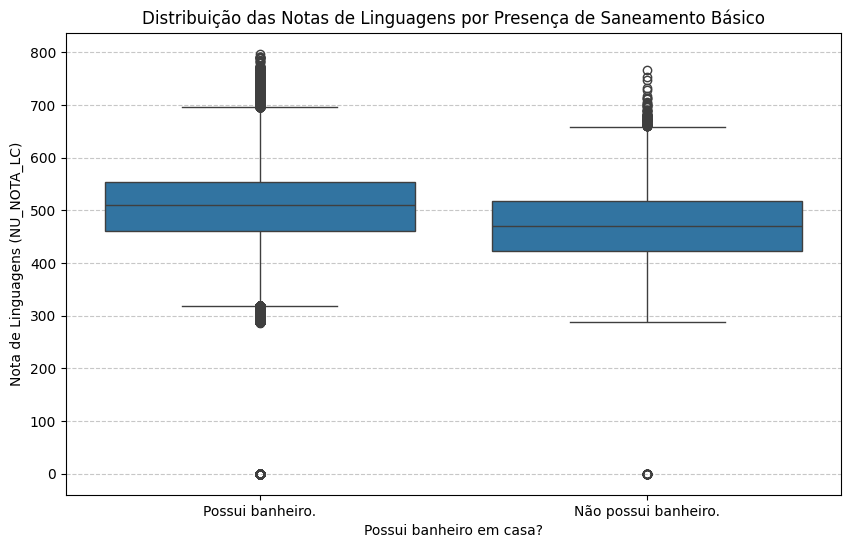

In [37]:
data["Q008_DESC"] = data["Q008"].map({
	"A": "Não possui banheiro.",
	"B": "Possui banheiro."
})

fig = plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Q008_DESC", y="NU_NOTA_LC")
plt.title("Distribuição das Notas de Linguagens por Presença de Saneamento Básico")
plt.xlabel("Possui banheiro em casa?")
plt.ylabel("Nota de Linguagens (NU_NOTA_LC)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
fig.savefig("./IMGs/Gráfico-13.1.png", dpi=500)
plt.show()